In [1]:
#1)	Import necessary and essential libraries

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt

In [3]:
df= pd.read_excel(r"HousePrediction.xlsx")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [5]:
#	Display all the Columns of DataFrames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [6]:
df.head(100)
df['TotalBsmtSF']=pd.to_numeric(df['TotalBsmtSF'], errors='coerce')
df['BsmtFinSF2']=pd.to_numeric(df['BsmtFinSF2'], errors='coerce')


In [7]:
df.shape

(2919, 13)

In [8]:
#4)	Give the column insights 

df.describe()


,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF2,TotalBsmtSF,SalePrice
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,1460.000000
mean,1459.000000,57.137718,10168.114080,5.564577,1971.312778,1984.264474,49.582248,1051.777587,180921.195890
std,842.787043,42.517628,7886.996359,1.113131,30.291442,20.894344,169.205611,440.766258,79442.502883
min,0.000000,20.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,34900.000000
25%,729.500000,20.000000,7478.000000,5.000000,1953.500000,1965.000000,0.000000,793.000000,129975.000000
50%,1459.000000,50.000000,9453.000000,5.000000,1973.000000,1993.000000,0.000000,989.500000,163000.000000
75%,2188.500000,70.000000,11570.000000,6.000000,2001.000000,2004.000000,0.000000,1302.000000,214000.000000
max,2918.000000,190.000000,215245.000000,9.000000,2010.000000,2010.000000,1526.000000,6110.000000,755000.000000


In [9]:
#Q1) Checking for Missing Values
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        1
BsmtFinSF2         1
TotalBsmtSF        1
SalePrice       1459
dtype: int64

In [10]:
df['SalePrice'].value_counts()

SalePrice
140000.0    20
135000.0    17
155000.0    14
145000.0    14
190000.0    13
            ..
202665.0     1
164900.0     1
208300.0     1
181500.0     1
147500.0     1
Name: count, Length: 663, dtype: int64

In [11]:
df['MSZoning'].isnull().sum()

4

In [12]:
df_mszoning= df['MSZoning']

In [13]:
df_mszoning.head()

0    RL
1    RL
2    RL
3    RL
4    RL
Name: MSZoning, dtype: object

In [14]:
df_mszoning.describe


<bound method NDFrame.describe of 0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2914    RM
2915    RM
2916    RL
2917    RL
2918    RL
Name: MSZoning, Length: 2919, dtype: object>

In [15]:
df['MSZoning']=df['MSZoning'].fillna("bfill")

In [16]:
df_mszoning.value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [17]:
df_mszoning.value_counts

<bound method IndexOpsMixin.value_counts of 0       RL
1       RL
2       RL
3       RL
4       RL
        ..
2914    RM
2915    RM
2916    RL
2917    RL
2918    RL
Name: MSZoning, Length: 2919, dtype: object>

In [18]:
df['Exterior1st']=df['Exterior1st'].fillna("bfill")

In [19]:
df['BsmtFinSF2']= df['BsmtFinSF2'].fillna("bfill")

In [20]:
df['TotalBsmtSF']=df['TotalBsmtSF'].fillna("bfill")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2919 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2919 non-null   object 
 10  BsmtFinSF2    2919 non-null   object 
 11  TotalBsmtSF   2919 non-null   object 
 12  SalePrice     1460 non-null   float64
dtypes: float64(1), int64(6), object(6)
memory usage: 296.6+ KB


In [22]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         0
TotalBsmtSF        0
SalePrice       1459
dtype: int64

In [23]:
df.duplicated().sum()

0

In [24]:
#Q1) Checking for Missing Values
df.SalePrice.unique()

array([208500., 181500., 223500., 140000., 250000., 143000., 307000.,
       200000., 129900., 118000., 129500., 345000., 144000., 279500.,
       157000., 132000., 149000.,  90000., 159000., 139000., 325300.,
       139400., 230000., 154000., 256300., 134800., 306000., 207500.,
        68500.,  40000., 149350., 179900., 165500., 277500., 309000.,
       145000., 153000., 109000.,  82000., 160000., 170000., 130250.,
       141000., 319900., 239686., 249700., 113000., 127000., 177000.,
       114500., 110000., 385000., 130000., 180500., 172500., 196500.,
       438780., 124900., 158000., 101000., 202500., 219500., 317000.,
       180000., 226000.,  80000., 225000., 244000., 185000., 144900.,
       107400.,  91000., 135750., 136500., 193500., 153500., 245000.,
       126500., 168500., 260000., 174000., 164500.,  85000., 123600.,
       109900.,  98600., 163500., 133900., 204750., 214000.,  94750.,
        83000., 128950., 205000., 178000., 118964., 198900., 169500.,
       100000., 1150

In [25]:
#Q1) Checking for Missing Values
df['SalePrice'].isnull().sum()


#or we can use the below code as well for checking the missing values
#df['SalePrice'].isna().sum()

1459

In [26]:
#Q2) Features with NAN Values

nan_values=df.isnull().sum()
print(nan_values)

Id                 0
MSSubClass         0
MSZoning           0
LotArea            0
LotConfig          0
BldgType           0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
Exterior1st        0
BsmtFinSF2         0
TotalBsmtSF        0
SalePrice       1459
dtype: int64


In [27]:
print("Features with NAN Values:",nan_values[nan_values>0])

Features with NAN Values: SalePrice    1459
dtype: int64


In [28]:
#Q3) Calculate  with  mean  sales Price where the information is present or Missing

df['SalePrice'].mean()

180921.19589041095

In [29]:
df['SalePrice'].mode()

0    140000.0
Name: SalePrice, dtype: float64

In [30]:
#Calculate mean sales price where information is present (non-missing)
mean_Sales_Price= df['SalePrice'].dropna().mean()


In [31]:
mean_Sales_Price

180921.19589041095

In [32]:
#Q4) Gives the Count  of Numerical features
#select_dtypes(include=['number']): return the dataframe that contain only number. 
#shape[0]: will give the count of the rows and shape[1]: will give the count of the columns

numerical_features_count= df.select_dtypes(include=np.number).shape[1]
print("Count of Numerical Features:", numerical_features_count)


Count of Numerical Features: 7


In [33]:
#Q5) Prints the first five rows of numerical values

df.select_dtypes(include=np.number).head()

,Id,MSSubClass,LotArea,OverallCond,YearBuilt,YearRemodAdd,SalePrice
0,0,60,8450,5,2003,2003,208500.0
1,1,20,9600,8,1976,1976,181500.0
2,2,60,11250,5,2001,2002,223500.0
3,3,70,9550,5,1915,1970,140000.0
4,4,60,14260,5,2000,2000,250000.0


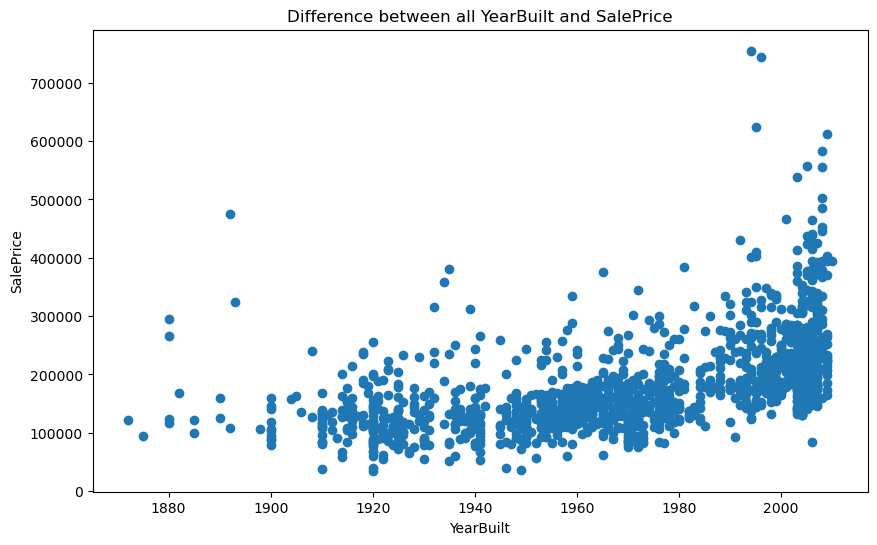

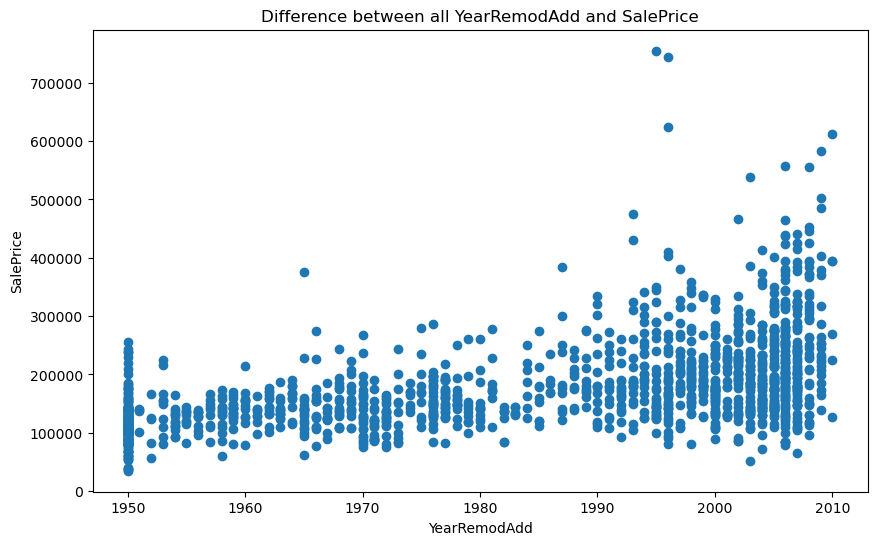

In [34]:
#Q6) We will Compare the difference between all the years features with SalesPrice
#The year columns are "YearBuilt" and "YearRemodAdd" . So we will consider it and compare with saleprice

years_feature= ["YearBuilt","YearRemodAdd"]

for feature in years_feature:
    plt.figure(figsize=(10,6))
    plt.scatter(df[feature],df["SalePrice"])
    plt.xlabel(feature)
    plt.ylabel("SalePrice")
    plt.title("Difference between all"+" "+ feature +" and SalePrice")
    plt.show()

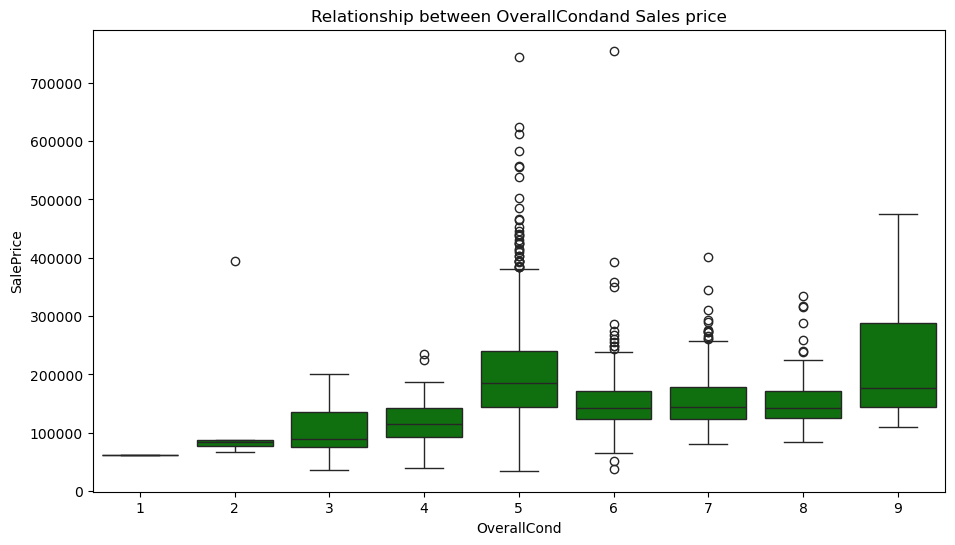

In [35]:
#Q7) On the Discrete Variable Find the relationship between Discrete and Sales price
#Consists of countable, distinct values (often whole numbers).Represents things that can be counted (e.g., number of rooms, number of people).
#So after anaylyse the data, we will conside OverallCond as discrete variable

discrete_var= "OverallCond"
plt.figure(figsize=(11,6))
sb.boxplot(x=df[discrete_var], y=df["SalePrice"], color= "g")
#plt.bar(df[discrete_var], df["SalePrice"])   : Barplot graph
plt.xlabel(discrete_var)
plt.ylabel("SalePrice")
#plt.xticks(rotation=90)
plt.title("Relationship between"+" "+ discrete_var +"and Sales price")
plt.show()


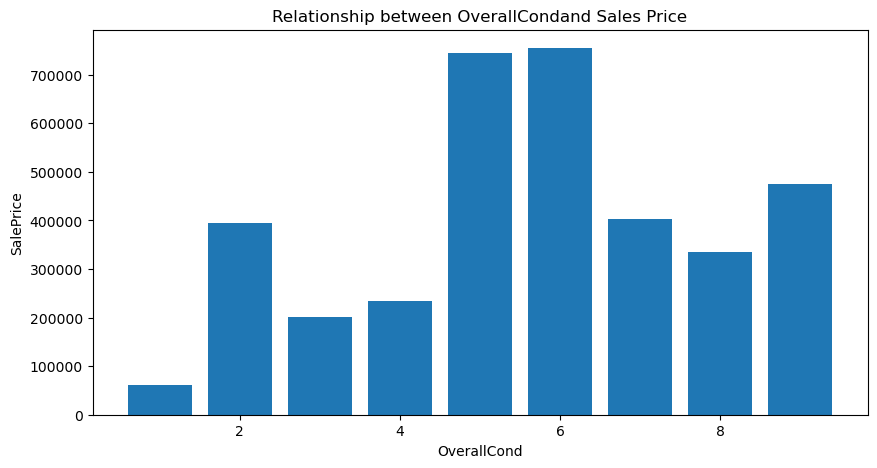

In [36]:
#Q8) On the Continous Variable Find the relationship between Discrete and Sales Price

discrete_feature= "OverallCond"
plt.figure(figsize=(10,5))
plt.bar(df[discrete_feature],df["SalePrice"])
plt.xlabel(discrete_feature)
plt.ylabel("SalePrice")
plt.title("Relationship between" +" "+discrete_feature+ "and Sales Price",)
plt.show()


In [37]:
#Q9) Analyse the Continous values by creating the histogram to understand the distribution.
'''we will take LotArea,TotalBsmtSF and SalePrice for the continous values as  
A continuous variable is a numeric variable that can take any value within a range. 
It can be measured and typically includes decimals or a large range of values'''


'we will take LotArea,TotalBsmtSF and SalePrice for the continous values as  \nA continuous variable is a numeric variable that can take any value within a range. \nIt can be measured and typically includes decimals or a large range of values'

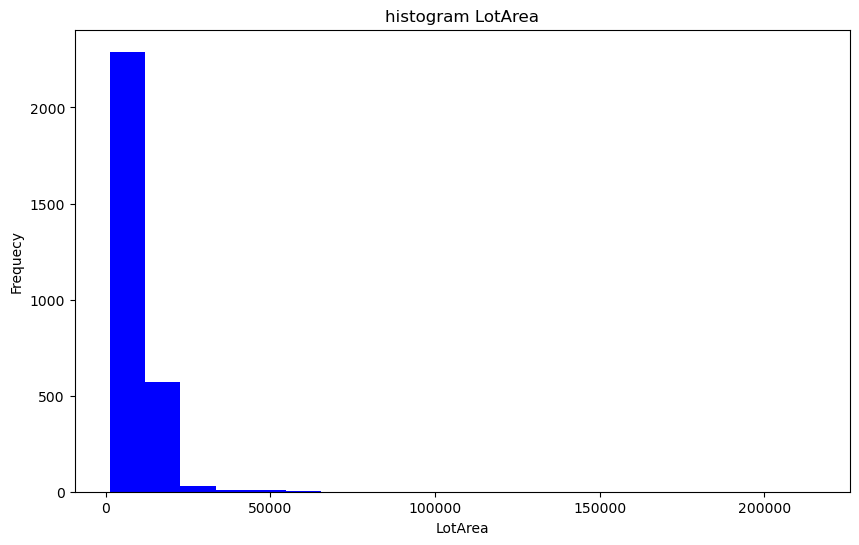

TypeError: '<=' not supported between instances of 'float' and 'str'

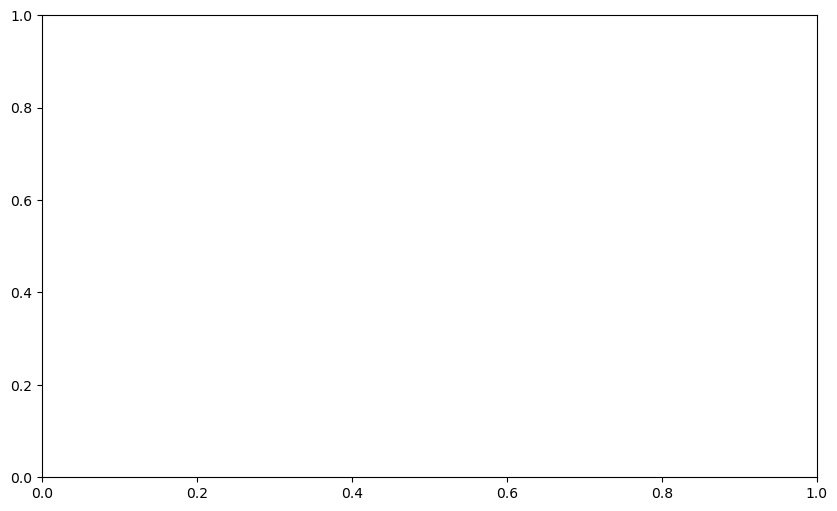

In [38]:
continous_data= ["LotArea","TotalBsmtSF","SalePrice"]
for histo in continous_data:
    plt.figure(figsize=(10,6))
    plt.hist(df[histo], bins=20, color="blue")
    plt.title("histogram"+" "+histo)
    plt.xlabel(histo)
    plt.ylabel("Frequecy")
    plt.show()
    

In [ ]:
df.select_dtypes(include=np.number).shape[1]

In [ ]:
df.nunique()

In [ ]:
#Copy the original data into df_log so that original data will not modify
df_log= df.copy()


In [ ]:
#Q10) Apply the Lograthmic Transformation
continous_data= ["LotArea","SalePrice","TotalBsmtSF"]
for colm in continous_data:
    df_log[colm]= np.log1p(df[colm])

df_log[continous_data].head(10)
#df_log[continous_data].tail(10)



In [ ]:
#Q1) Find the Outliers 
#Define the function to detect outliers using IQR
'''Why 1.5? It provides a good balance between excluding extreme values while keeping most data points.
If we used 3× IQR, it would detect only extreme outliers.'''
df_outliers= df.copy()

def find_outliers_iqr(findings, column):
    Q1= findings[column].quantile(0.25)  #First quartile (25th percentile)
    Q3= findings[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR= Q3-Q1  # Interquartile range
    lower_bound= Q1-1.5*IQR
    upper_bound= Q3-1.5*IQR
    outliers= findings[(findings[column]<lower_bound) | (findings[column]>upper_bound)]
    return outliers

outliers_funcall= find_outliers_iqr(df_outliers,"SalePrice")
outliers_funcall.head(10)
#print(outliers_funcall)


In [ ]:
df.info()

In [ ]:
#Q2) Find the relationship between Categorical feature and Sales Price
categorial_data= ["MSZoning","LotConfig","BldgType","Exterior1st"]

for catg_data in categorial_data:
    plt.figure(figsize=(10,6))
    sb.boxplot(x=df[catg_data], y=df["SalePrice"], color= "blue")
    plt.title("Relationship between"+" "+catg_data+ " and SalePrice")
    plt.xticks(rotation=90)
    plt.xlabel(catg_data)
    plt.ylabel("SalePrice")
plt.show()

In [ ]:
#Q3) Find the Correlation between Numerical Features and Sales Price
df_temp= df.drop(columns=['Id'])
numberical_feature= df_temp.select_dtypes(include=['float64','int64'])

correlation_matrix= numberical_feature.corr()
correlation_with_price=correlation_matrix["SalePrice"].sort_values(ascending= False)
correlation_with_price.head()

plt.figure(figsize=(12,7))
sb.heatmap(correlation_matrix,cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation between Numerical Features and Sales Price")
plt.show()

In [ ]:
correlation_with_price.head()

In [ ]:
#Q4) Find Continous Features vs Sales Price
'''Scatter plots are the best choice for analyzing the relationship between 
continuous numerical features and SalePrice because:
'''
continous_Features= ["LotArea","TotalBsmtSF","BsmtFinSF2"]
for cont_feature in continous_Features:
    plt.figure(figsize=(10,6))
    plt.scatter(x=df[cont_feature],y=df["SalePrice"])
    plt.title("Continous Features"+" "+ cont_feature + "vs SalesPrice")
    plt.xlabel(cont_feature)
    plt.ylabel("SalePrice")
    
plt.show()


In [ ]:
df.info()

In [ ]:
''' Q5) Do the Feature Engineering for the 
		a)Handle the Missing Values
		b) Handle the Categorical Variables
		c) Handle  the Numerical Variables
		d) Handling  the Temporal Varaibles  

✅ Numerical Features → Use median or mean.
✅ Categorical Features → Use mode (most frequent category).
✅ Temporal Features → Use median if it's a year-related column.
  
  '''


In [ ]:
df.isnull().sum()

In [ ]:
'''handing the missing value
df['MSZoning']=df['MSZoning'].fillna("bfill")

Now the only missing value is salesprice. Rest of the missing values in columns are already handled. '''

df['SalePrice'].median()


In [40]:
#handing the missing value

df['SalePrice'].fillna(df['SalePrice'].median(), inplace=True)

C:\Users\Lokesh\AppData\Local\Temp\ipykernel_23828\1263457067.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['SalePrice'].fillna(df['SalePrice'].median(), inplace=True)
